# Analysis of Yelp Business Intelligence Data

## Installation and Initial Setup

In [1]:
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("seaborn==0.10.1")
sc.install_pypi_package("numpy==1.18.3")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1588269130434_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)

  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

  Using cached numpy-1.18.3-cp36-cp36m-manylinux1_x86_64.whl (20.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Not uninstalling numpy at /usr/local/lib64/python3.6/site-packages, outside environment /tmp/1588273014875-0
    Can't uninstall 'numpy'. No files were found to uninstall.




ERROR: python36-sagemaker-pyspark 1.2.6 requires pyspark==2.3.2, which is not installed.

## Importing

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

In [3]:
df = spark.read.json('s3://mm-sta9760-yelpdataset/*business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data

In [4]:
print('Columns:', len(df.dtypes),'| Rows:',df.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 209393

In [5]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [6]:
df.createOrReplaceTempView("business")
res = spark.sql('select business_id,name,city,state,stars,categories from business limit 5')
res.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+-----+--------------------+
|         business_id|                name|           city|state|stars|          categories|
+--------------------+--------------------+---------------+-----+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|  3.5|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|  5.0|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|  5.0|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|  2.5|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|  4.5|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+-----+--------------------+

## Analyzing Categories

### Association Table

In [7]:
dfassoc = spark.sql("select business_id,explode(split(categories,', ')) category from business")
dfassoc.createOrReplaceTempView("categories")

res = spark.sql("select * from categories limit 5")
res.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+

### Total Unique Categories

In [8]:
res = spark.sql("select distinct category from categories")
print('Total unique categories:',res.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total unique categories: 1336

## Top Categories By Business

### Counts of Businesses / Category

In [9]:
res = spark.sql("select category, count(*) count from categories group by category")
res.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Dermatologists|  341|
|   Historical Tours|   54|
|Mobile Home Dealers|   16|
|     Paddleboarding|   36|
|   Hot Air Balloons|   21|
|       Aerial Tours|   28|
|      Skating Rinks|  104|
|  Signature Cuisine|    1|
|             Fondue|   54|
|      Data Recovery|  195|
|  Pet Waste Removal|   34|
|      Videographers|  169|
|    Pet Photography|   49|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|Private Jet Charter|   10|
+-------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

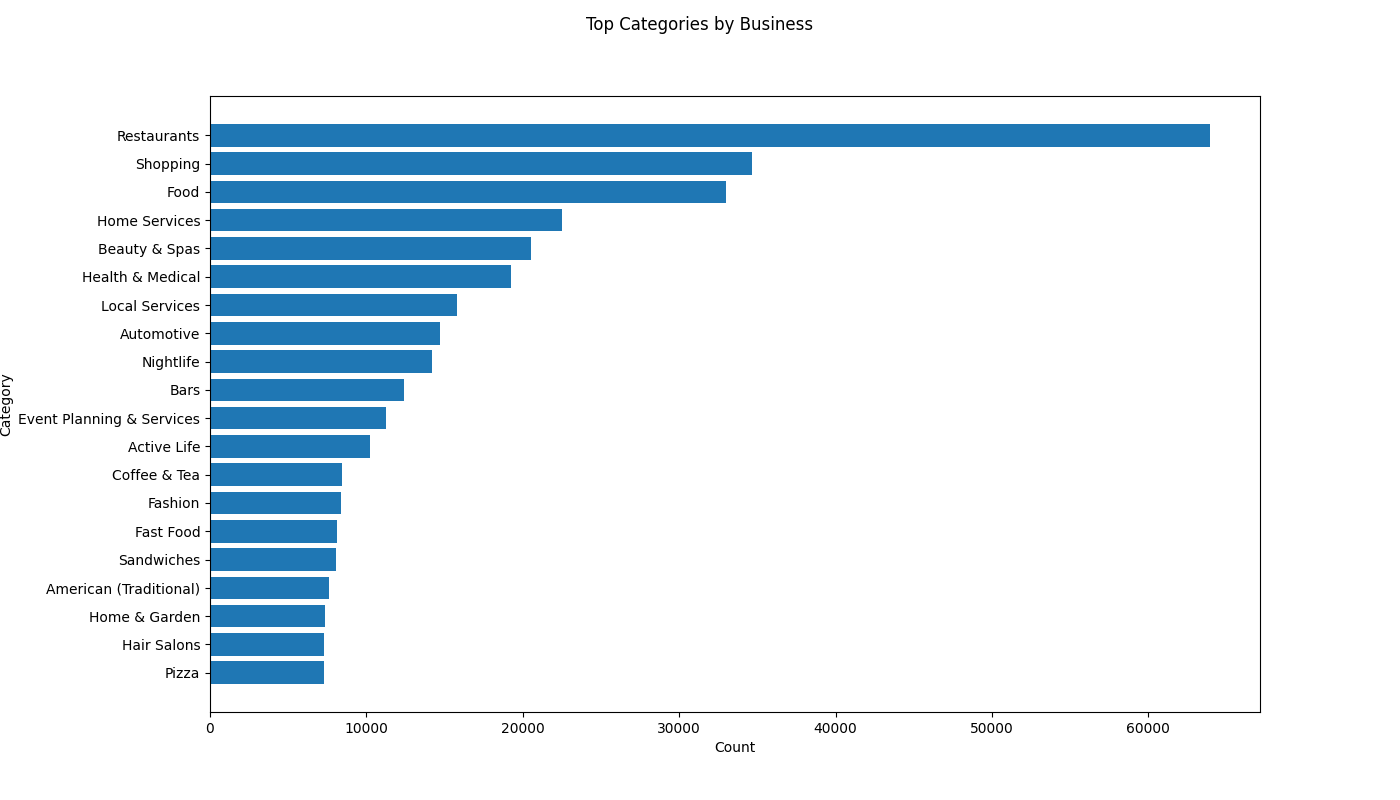

In [10]:
topcats = spark.sql("select category, count(*) count from categories group by category order by count(*) desc limit 20")
cats = [row[0] for row in topcats.select('category').collect()]
counts = [row[0] for row in topcats.select('count').collect()]

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Count')
ax.set_ylabel('Category')
fig.suptitle('Top Categories by Business')
fig.subplots_adjust(left=0.15)
ax.barh(cats,counts, align='center')
ax.invert_yaxis()
%matplot plt

## Do Yelp Reviews Skew Negative?

### Loading User Data

In [11]:
df = spark.read.json('s3://mm-sta9760-yelpdataset/*review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [13]:
df.createOrReplaceTempView("review")
res = spark.sql('select business_id, stars from review limit 5')
res.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+

In [14]:
res = spark.sql('select business_id, avg(stars) avg_stars from review group by business_id')
res.createOrReplaceTempView("avgreview")
res = spark.sql('select * from avgreview limit 5')
res.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         avg_stars|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vQGZjrDiDBuznOkUe...| 4.454545454545454|
|vyu1WGlnHGv2Z2MVE...|               5.0|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+

In [15]:
res = spark.sql('select ar.*,b.stars,b.name,b.city,b.state from business b left outer join avgreview ar on b.business_id = ar.business_id')
res.createOrReplaceTempView("skew")
res = spark.sql("select avg_stars,stars,name,city,state from skew limit 5")
res.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------------+-----+
|         avg_stars|stars|                name|             city|state|
+------------------+-----+--------------------+-----------------+-----+
|               5.0|  5.0|      Bachelor Vegas|        Las Vegas|   NV|
| 4.029411764705882|  4.0|Bonga Korean Rest...|          Calgary|   AB|
| 3.380952380952381|  3.5|Cracker Barrel Ol...|Sheffield Village|   OH|
| 4.760869565217392|  5.0|Xpand Realty & Pr...|        Las Vegas|   NV|
|1.7272727272727273|  1.5|  Buffalo Bill Wings|         Montréal|   QC|
+------------------+-----+--------------------+-----------------+-----+

In [16]:
skew = spark.sql("select (avg_stars-stars)/stars skew from skew")
skew.limit(5).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|                skew|
+--------------------+
|0.029460352422907565|
|-0.06666666666666661|
|-0.02777777777777...|
|-0.04761904761904...|
|                 0.0|
+--------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

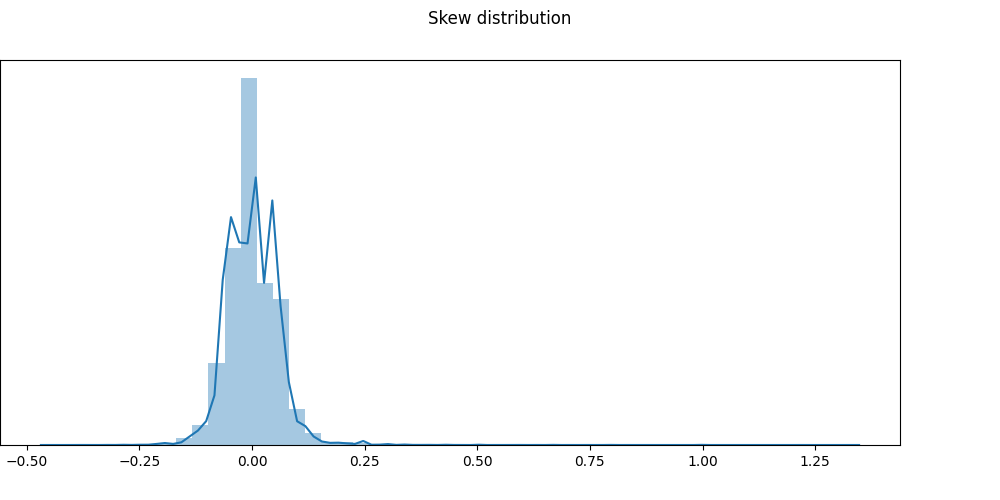

In [17]:
skews = [row[0] for row in skew.select('skew').collect()]
fig = plt.figure(figsize=(10,5))
fig.suptitle('Skew distribution')
fig.subplots_adjust(left=0)
ax = fig.add_subplot(111)
ax = sns.distplot(skews)
%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

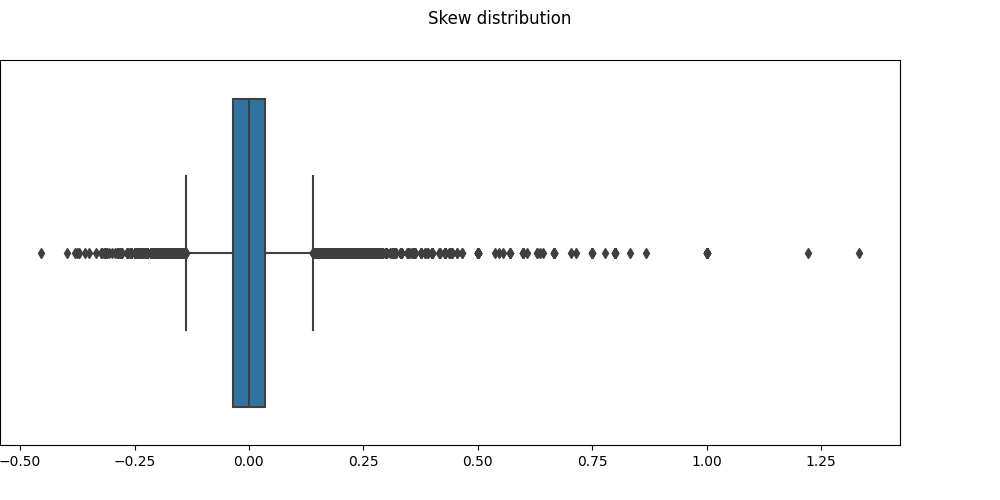

In [18]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Skew distribution')
fig.subplots_adjust(left=0)
ax = fig.add_subplot(111)
ax = sns.boxplot(skews)
%matplot plt

#### Analysis
Based on the above visualizations it seems that there is actually a longer tail to the positive side.  Intuition (and my own experience) tells me that reviewers would be more motivated to write a review when having a negative experience, however that is not what we are seeing above.

## How Generous are the Elite ? 
We will look at the skews of non elite vs elite users to determine which user group is typically more generous in their reviews.

In [19]:
df = spark.read.json('s3://mm-sta9760-yelpdataset/*user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [21]:
df.createOrReplaceTempView("user")
res = spark.sql('''select 
                        u.elite,
                        u.user_id,
                        r.stars u_stars,
                        b.business_id, 
                        b.stars b_stars 
                    from user u 
                        inner join review r
                            on r.user_id = u.user_id
                        inner join business b
                            on r.business_id = b.business_id''')
res.createOrReplaceTempView("user_rev_bus")
res = spark.sql('select * from user_rev_bus limit 5')
res.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------+--------------------+-------+
|               elite|             user_id|u_stars|         business_id|b_stars|
+--------------------+--------------------+-------+--------------------+-------+
|                    |-0Ji0nOyFe-4yo8BK...|    4.0|pmrHuQiy25xKB86tb...|    4.0|
|                    |-0XPr1ilUAfp-yIXZ...|    2.0|QhwaGi1niDeVEHMRt...|    2.5|
|2011,2012,2013,20...|-1KKYzibGPyUX-Mwk...|    4.0|L772e6l2Yd0DJEyCB...|    3.0|
|                    |-1zQA2f_syMAdA04P...|    5.0|DyYS-JKXlW2PCr_Gt...|    3.5|
|                    |-1zQA2f_syMAdA04P...|    5.0|aNe8ofTYrealxqv7V...|    3.5|
+--------------------+--------------------+-------+--------------------+-------+

In [22]:
#Create a boolean field for elite status
res = spark.sql("select case when length(elite) < 1 then 'No' else 'Yes' end is_elite, * from user_rev_bus")
res.createOrReplaceTempView("user_rev_bus")
res.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------------------+--------------------+-------+--------------------+-------+
|is_elite|               elite|             user_id|u_stars|         business_id|b_stars|
+--------+--------------------+--------------------+-------+--------------------+-------+
|      No|                    |-0Ji0nOyFe-4yo8BK...|    4.0|pmrHuQiy25xKB86tb...|    4.0|
|      No|                    |-0XPr1ilUAfp-yIXZ...|    2.0|QhwaGi1niDeVEHMRt...|    2.5|
|     Yes|2011,2012,2013,20...|-1KKYzibGPyUX-Mwk...|    4.0|L772e6l2Yd0DJEyCB...|    3.0|
|      No|                    |-1zQA2f_syMAdA04P...|    5.0|DyYS-JKXlW2PCr_Gt...|    3.5|
|      No|                    |-1zQA2f_syMAdA04P...|    1.0|fuC3sui68QWg-rqld...|    3.0|
|      No|                    |-1zQA2f_syMAdA04P...|    5.0|aNe8ofTYrealxqv7V...|    3.5|
|      No|                    |-1zQA2f_syMAdA04P...|    1.0|5c-b0ALS_DyLvRCGr...|    2.5|
|      No|                    |-1zQA2f_syMAdA04P...|    1.0|sAS4fHDiK8A9a1wEA...|    3.5|
|      No|

In [23]:
#Calculate skews for Elite vs Non Elite users

res = spark.sql("select (u_stars-b_stars)/b_stars skew from user_rev_bus where is_elite = 'Yes'")
elite_skews = [row[0] for row in res.select('skew').collect()]

res = spark.sql("select (u_stars-b_stars)/b_stars skew from user_rev_bus where is_elite = 'No'")
nonelite_skews = [row[0] for row in res.select('skew').collect()]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

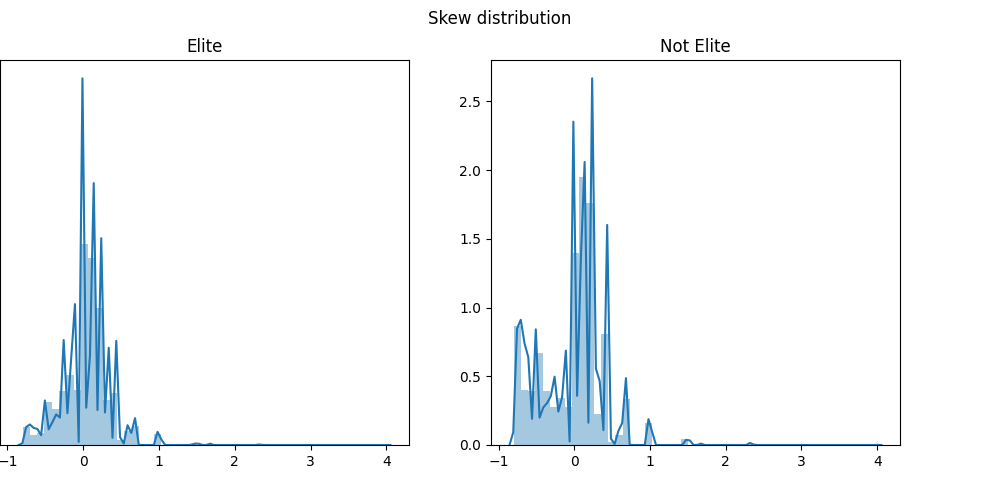

In [24]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Skew distribution')
fig.subplots_adjust(left=0)

ax = fig.add_subplot(121)
ax = sns.distplot(elite_skews)

ax2 = fig.add_subplot(122)
ax2 = sns.distplot(nonelite_skews)

ax.title.set_text('Elite')
ax2.title.set_text('Not Elite')
%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

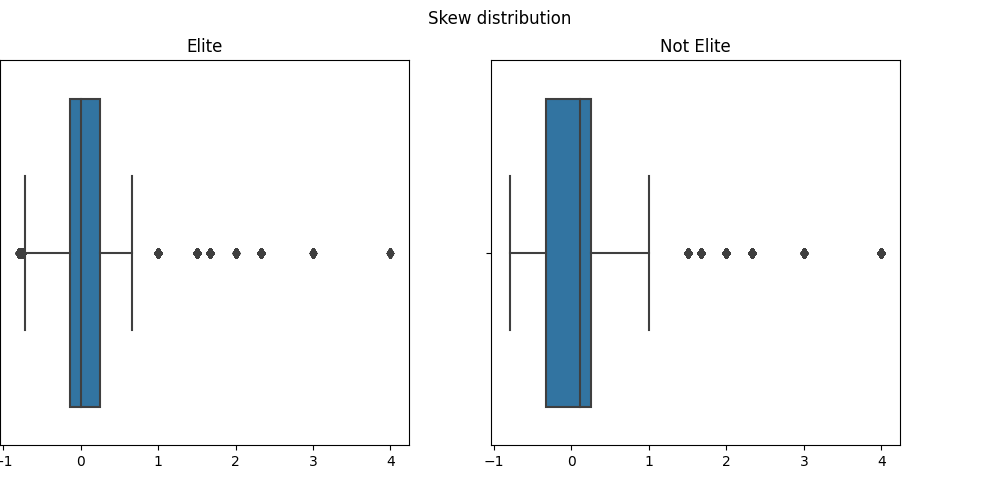

In [25]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Skew distribution')
fig.subplots_adjust(left=0)
ax = fig.add_subplot(121)
ax = sns.boxplot(elite_skews)

ax2 = fig.add_subplot(122)
ax2 = sns.boxplot(nonelite_skews)

ax.title.set_text('Elite')
ax2.title.set_text('Not Elite')
%matplot plt


#### Analysis
Based on the above distribution of review skews, we can see that the Elite tend to be a bit more critical than Non Elite users.  We can see from the distribution plot that Non Elite reviews tend to skew slightly positive whereas Elite reviews tend to skew slightly negative.
